<a href="https://colab.research.google.com/github/Anastasiamay/Tinkoff/blob/main/project_a_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Проекта по A/B - тестам

**Контекст**
Мы много платим оператору из-за того,
что он сам по каждому заданию
звонит клиенту и ждёт ответа клиента.
Мы хотим попробовать снизить затраты на операторов,
внедрив систему,
которая будет сама звонить человеку
и в случае успеха перенаправлять задание оператору.
        
**Тест**
Мы проводим тест,
в рамках которого мы разбиваем весь поток
на две части рановероятно,
где одной части (контролю) мы продаём 
без автоматической системы дозвона,
а второй части (тесту) - с ней.
Целью этого теста
является снижение расходов на задание.

**Статистические вводные**
Уровень значимости 5%.
Мы хотели бы различать 5%-ное 
изменение целевой метрики
с вероятностью 90%.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
from scipy.stats import levene
from scipy.stats import ks_2samp

In [ ]:
!gdown --id 17JYq7KEXHXbw9ftXLIIaIUe49DdQLg0n
df = pd.read_csv('hist_telesales.csv')
df

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=17JYq7KEXHXbw9ftXLIIaIUe49DdQLg0n
To: /content/hist_telesales.csv
100% 1.46M/1.46M [00:00<00:00, 151MB/s]


,ID,Флаг дозвона,Флаг продажи,Расходы,PV,NPV
0,0,1,0,90,0,-90
1,1,0,0,5,0,-5
2,2,0,0,68,0,-68
3,3,1,0,22,0,-22
4,4,1,0,22,0,-22
...,...,...,...,...,...,...
72156,72156,1,1,577,1346,769
72157,72157,0,0,8,0,-8
72158,72158,0,0,23,0,-23
72159,72159,0,0,4,0,-4


* ID - номер задания на звонок
* Флаг дозвона - 1 если в рамках задания мы дозвонились человеку, иначе 0
* Флаг продажи - 1 если в рамках задания мы продали наш продукт человеку, иначе 0
* Расходы - сумма затрат на задание
* PV - 0 если мы не продали наш продукт, иначе = PV проданного продукта
* NPV = PV - Расходы

### 1. Необходимо выбрать метрику и привести аргументацию.

Будем использовать метрику расходы - сумму затрат на задание, которая включает затраты на оператора. Метрика позволит наиболее точно ответить на поставленный вопрос: снизяться ли затраты на операторов, если внедрить систему автоматического дозвона. Если расходы снизяться, значит затраты на операторов снизились

### 2. Альтернатива в критерии.

H0: расходы при использовании системы автоматического дозвона не отличаются от расходов без использования этой системы

H1: при использовании системы автоматического дозвона расходы снизяться

### 3. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

Из условия имеем:
- односторонняя альтернатива
- alpha =  0.05
- beta = 0.1 (1 - 0.9) 
- желаемое изменение метрики = 0.05

MDE = средние расходы * желаемое изменение метрики

Формула для расчета выборки: N = (2 * σ^2 * (Z_1-α - Zβ) ^2) / MDE^2



In [ ]:
MDE = df['Расходы'].mean() * 0.05
sigma_2 = df['Расходы'].var(ddof=1)
N  = (2 * sigma_2 * (st.norm.ppf(1 - 0.05) - st.norm.ppf(0.1))**2)  / MDE ** 2
print('Размер выборки: ', round(N))

Размер выборки:  22531


In [ ]:
!gdown --id 1eZ1FvYc8gKrWb5rS3_e463bZR8gr3Ip8
!gdown --id 1Te4jvqR1juwbuYGwN0wXXqO2tYttqI9T
t1 = pd.read_csv('Тест1.csv')
c1 = pd.read_csv('Контроль1.csv')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1eZ1FvYc8gKrWb5rS3_e463bZR8gr3Ip8
To: /content/Тест1.csv
100% 446k/446k [00:00<00:00, 75.9MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Te4jvqR1juwbuYGwN0wXXqO2tYttqI9T
To: /content/Контроль1.csv
100% 446k/446k [00:00<00:00, 30.4MB/s]


### 4. Принятие решения. Расписать подробно с аргументами.

In [ ]:
t1['Расходы'].describe()

count    22531.000000
mean       195.398695
std        353.283433
min          0.000000
25%         21.000000
50%         58.000000
75%        178.000000
max       5617.000000
Name: Расходы, dtype: float64

In [ ]:
c1['Расходы'].describe()

count    22531.000000
mean       195.907505
std        352.791684
min          0.000000
25%         21.000000
50%         58.000000
75%        178.000000
max       4428.000000
Name: Расходы, dtype: float64

Проверим выборки на равенство дисперсий тестом Левена

H0: дисперсии тестовой и контрольной группы равны

H1: дисперсии тестовой и контрольной группы различаются

In [ ]:
statistic, p_value = levene(t1['Расходы'], c1['Расходы'])
print("p-value:", p_value)
if p_value < .05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.9571197396004292
Не получилось отвергнуть нулевую гипотезу


Дисперсии тестовой и контрольной группы равны. Для проверки гипотезы будем использовать ttest_ind, хоть данные имеют выбросы, но они не являются результатом ошибок или некорректных измерений и имеем достаточно большое количество наблюдений. Установим параметр, указывающий, что дисперсии двух выборок равны equal_var=True и аргумент,  который определяет тип альтернативной гипотезы, alternative='less', так как альтернативная гипотеза заключается в том, что среднее значение тестовой выборки меньше, чем среднее значение контрольной выборки.

In [ ]:
results = st.ttest_ind(t1['Расходы'], c1['Расходы'], equal_var=True, alternative='less')

alpha = 0.05
print(results.pvalue) 

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.43921080046740224
Не получилось отвергнуть нулевую гипотезу


Т-Тест для двух независимых выборок показал, что нет оснований отвергать нулевую гипотезу. Расходы при использовании системы автоматического дозвона не отличаются от расходов без использования этой системы. То есть внедрение системы автоматического дозвона не показало уменьшения расходов в тестовой группе, а значит вводить эту систему не имеет смысла

------------------

**Контекст**
Мы провели конкурентный анализ
и поняли,
что тариф нашей услуги достаточно низкий.
Мы хотим попробовать повысить тариф,
и надеемся,
что снижение конверсии в подключение услуги
компенсируется ростом дохода с этой услуги.
        
**Тест**
Мы проводим тест,
в рамках которого мы разбиваем весь поток
на две части рановероятно,
где одной части (контролю) 
мы будем предлагать старый тариф услуги,
а второй части (тесту) - новый тариф услуги.
Целью этого теста
является увеличение доходности услуги.

**Статистические вводные**
* Проверка однородности выбранного параметра
осуществляется с уровнем значимости 2%.
* Уровень значимости 5%.
* Мы хотели бы различать 8%-ное
изменение целевой метрики
с вероятностью 90%.

In [ ]:
!gdown --id 12QQ2oQaF4do22KV9yogGx2x6LZQssHzO
credit = pd.read_csv('hist_credit_card.csv')
credit

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=12QQ2oQaF4do22KV9yogGx2x6LZQssHzO
To: /content/hist_credit_card.csv
100% 8.26M/8.26M [00:00<00:00, 18.3MB/s]


,ID,Возраст,Доход клиента,Вероятность банкротства,Флаг утилизации счёта,Расходы,PV КК,PV услуги,NPV
0,0,19,21620.835463,0.138061,0,102,0,0,-102
1,1,27,24897.990863,0.035508,1,409,11686,1754,13031
2,2,50,23989.526947,0.098793,0,16,0,0,-16
3,3,18,38442.409756,0.365661,1,788,13738,1578,14528
4,4,24,21291.521612,0.036909,1,1048,6594,2213,7759
...,...,...,...,...,...,...,...,...,...
123250,123250,32,26099.633927,0.110756,0,47,0,0,-47
123251,123251,20,24579.749275,0.113920,1,594,14268,1672,15346
123252,123252,36,34062.902531,0.247122,1,77,5950,2017,7890
123253,123253,67,24609.838522,0.020752,1,279,6278,1847,7846


* ID - номер заявки, прошедшей скоринг
* Возраст - возраст клиента, указанный при оформлении КК
* Доход клиента - доход клиента, указанный при оформлении КК
* Вероятность банкротства - оценка вероятности банкротства клиента, полученная с помощью скоринга по параметрам клиента
* Флаг утилизация счёта - совершение первой расходной операции на счёте КК
* Расходы - сумма затрат на заявку
* PV КК - 0 если счёт не утилизирован, иначе = PV кредитной карты
* PV услуги - 0 если счёт не утилизирован, иначе = PV этой услуги
* NPV = PV КК + PV услуги - Расходы

### 1. Необходимо выбрать метрику и привести аргументацию.

Метрка PV услуги напрямую отражает финансовый результат изменения тарифа

### 2. Альтернатива в критерии.

H0: PV услуги при новом тарифе услуги не отличается от PV услуги при старом тарифе услуги

H1: PV услуги при новом тарифе услуги будет больше, чем при старом тарифе услуги

### 3. Нужно выбрать параметр(-ы), влияющий(-ие) на целевую метрику. Привести аргументацию.

Посмотрим корреляцию Спирмена целевой метрики с другими признаками

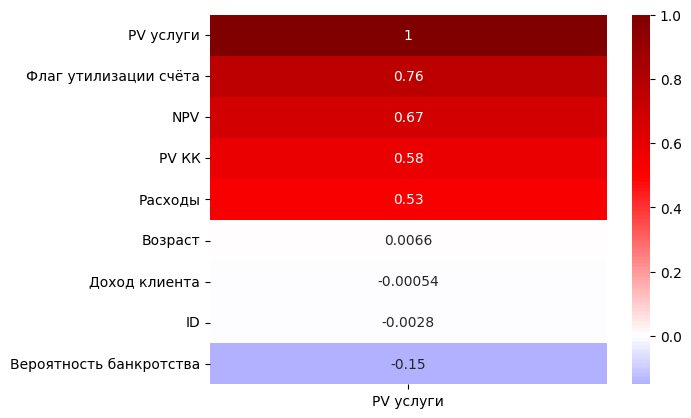

In [ ]:
sns.heatmap(credit.corr(method='spearman')['PV услуги'].sort_values(ascending=False).to_frame(), annot=True, cmap='seismic', center=0);

Нужно выбрать параметр влияющий на целевую метрику, который можно рассматривать до принятия решения о выдаче кредитной карты, то есть социально-демографические признаки и оценка скоринга, здесь - вероятность банкротства, расчитанная на ее основе. В качестве такого параметра по рассмотренной кореляции больше подходит вероятность банкротства, она самая высокая по модулю

### 4. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

Из условия имеем:
- односторонняя альтернатива
- alpha =  0.05
- beta = 0.1 (1 - 0.9) 
- желаемое изменение метрики = 0.08

MDE = среднее PV услуги * желаемое изменение метрики

In [ ]:
MDE2 = credit['PV услуги'].mean() * 0.08
sigma = credit['PV услуги'].var(ddof=1)
N2  = (2 * sigma * (st.norm.ppf(1 - 0.05) - st.norm.ppf(0.1))**2)  / MDE2 ** 2
print('Размер выборки: ', round(N2))

Размер выборки:  2232


In [ ]:
!gdown --id 1LNtHiwM8kRo9L9c7Y5fLJ4VElEAoRaEt
!gdown --id 1akKkfeMkofKPpBEh9VwBeKipEaGcZcgo
t2 = pd.read_csv('Тест.csv')
c2 = pd.read_csv('Контроль.csv')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1LNtHiwM8kRo9L9c7Y5fLJ4VElEAoRaEt
To: /content/Контроль.csv
100% 146k/146k [00:00<00:00, 94.1MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1akKkfeMkofKPpBEh9VwBeKipEaGcZcgo
To: /content/Тест.csv
100% 146k/146k [00:00<00:00, 48.4MB/s]


### 5. Проверка на однородность, применение критерия. Принятие решения. Расписать подробно с аргументами.

Для проверки двух выборок на однородность по признаку вероятности банкротства будем использовать тест Колмогорова-Смирнова 

H0: между распределениями нет разницы, выборки однородны

H1: между распределениями есть разница, выборки не однородны

In [ ]:
stat, p = ks_2samp(t2['Вероятность банкротства'], c2['Вероятность банкротства'])
alpha = 0.02
print(p) 

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.5309206798802529
Не получилось отвергнуть нулевую гипотезу


Тест Колмогорова-Смирнова показал, что выборки однородны. Проверим выборки на равенство дисперсий тестом Левена

H0: дисперсии тестовой и контрольной группы равны

H1: дисперсии тестовой и контрольной группы различаются

In [ ]:
statistic, p_value = levene(t2['PV услуги'], c2['PV услуги'])
print("p-value:", p_value)
if p_value < .05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.66670000619201
Не получилось отвергнуть нулевую гипотезу


In [ ]:
t2['NPV'].describe()

count      2232.000000
mean       8625.515233
std        9661.736348
min        -524.000000
25%           0.000000
50%        7860.000000
75%       10771.250000
max      148132.000000
Name: NPV, dtype: float64

In [ ]:
c2['NPV'].describe()

count      2232.000000
mean       8766.765681
std       14711.746787
min        -364.000000
25%          -5.000000
50%        7743.500000
75%       10572.750000
max      390579.000000
Name: NPV, dtype: float64

Дисперсии тестовой и контрольной группы равны. Применим ttest_ind к основной гипотезе. Установим параметр, указывающий, что дисперсии двух выборок равны equal_var=True и аргумент,  который определяет тип альтернативной гипотезы, alternative='greater', так как альтернативная гипотеза заключается в том, что среднее значение тестовой выборки больше, чем среднее значение контрольной выборки

In [ ]:
results = st.ttest_ind(t2['PV услуги'], c2['PV услуги'], equal_var=True, alternative='greater')

alpha = 0.05
print(results.pvalue) 

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.0025938546775305413
Отвергаем нулевую гипотезу


При заданном уровне значимости отвергли нулевую гипотезу. Есть разница между PV услуги тестовой группы с новым тарифом услуги и PV услуги контрольной группы со старым тарифом услуги. При увеличении стоимости тарифа услуги, доходность услуги в тестовой группе изменилась, поэтому стоит увеличить стоимость тарифа услуги для всех клиентов